## Exercícios

1 - Aplique os algoritmos K-means [1] e AgglomerativeClustering [2] em qualquer dataset que você desejar (recomendação: iris). Compare os resultados utilizando métricas de avaliação de clusteres (completeness e homogeneity, por exemplo) [3].

* [1] http://scikit-learn.org/stable/modules/clustering.html#k-means

* [2] http://scikit-learn.org/0.17/modules/clustering.html#hierarchical-clustering

* [3] http://scikit-learn.org/stable/modules/clustering.html#clustering-evaluation

2 - Qual o valor de K (número de clusteres) você escolheu para a questão anterior? Desenvolva o Método do Cotovelo (não utilizar lib!) e descubra o K mais adequado. Após descobrir, aplique novamente o K-means com o K adequado. 

* Ajuda: atributos do [k-means](http://scikit-learn.org/0.17/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans)

3 - Após a questão 2, você aplicou o algoritmo com K apropriado. Refaça o cálculo das métricas de acordo com os resultados de clusters obtidos com a questão anterior e verifique se o resultado melhorou.







### Bibliotecas

In [1]:
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.cross_validation import train_test_split
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

/home/minhotmog/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# 1ª Questão:

### Carregando o Dataset (MoCap Hand Postures)

In [2]:
# Carregando o Wine Dataset (http://archive.ics.uci.edu/ml/datasets/Wine)
data = pd.read_csv("wine.data", header=None)
X = data.iloc[:,1:].values
y = data.iloc[:,0].values

### Visualização dos Dados

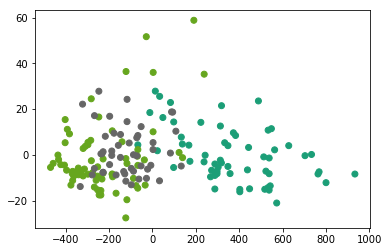

In [3]:
# Plotando uma visualização 2-Dimensional dos Dados
# Podemos observar que os dados (em 2-Dimensões) são extremamente superpostos
pcaData = PCA(n_components=2).fit_transform(X)

plt.scatter(pcaData[:,0], pcaData[:,1], c=y, cmap=plt.cm.Dark2)
plt.show()

### Aplicação do K-Means

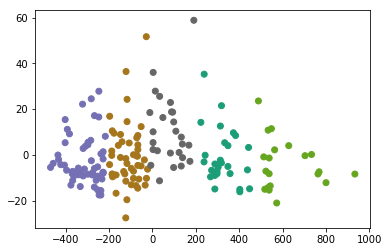

In [4]:
# Criamos o objeto da classe KMeans
# Veremos o quão bom o K-Means conseguiria separar as 3 classes
kmeans = KMeans(n_clusters=5, random_state=0)

# Realizamos a Clusterização
kmeans.fit(X)

# Plotando uma visualização 2-Dimensional dos Dados, agora com os clusteres designados pelo K-Means
# Compare a visualização com o gráfico da celula de cima
clts = kmeans.predict(X)
plt.scatter(pcaData[:,0], pcaData[:,1], c=clts, cmap=plt.cm.Dark2)
plt.show()


### Métricas de Avaliação

In [5]:
# Utilizamos três métricas de avaliação dos Clusteres, com base nos dados já classificados: 
# -> Homogeneity: porcentagem relativa ao objetivo de ter, em cada cluster, apenas membros de uma mesma classe
# -> Completeness: porcentagem relativa ao objetivo de ter todos os membros de uma classe no mesmo cluster
# -> V-Measure: medida que relaciona Homogeneity com Completeness, e é equivalente à uma métrica conhecida como NMI (Normalized Mutual Information).
homoScore = metrics.homogeneity_score(y, clts)
complScore = metrics.completeness_score(y, clts)  
vMeasureScore = metrics.v_measure_score(y, clts)

print("### Avaliação ({0} Clusters) ###".format(kmeans.n_clusters))
print("Homogeneity: \t{0:.3}".format(homoScore))
print("Completeness: \t{0:.3}".format(complScore))
print("V-Measure: \t{0:.3}".format(vMeasureScore))

### Avaliação (5 Clusters) ###
Homogeneity: 	0.495
Completeness: 	0.351
V-Measure: 	0.411


# 2ª Questão

### Implementando o Método do Cotovelo

..............

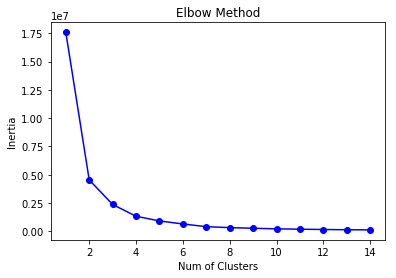

In [6]:
# Método do Cotevelo baseado na Inertia (Soma Quadrática da Distância Intra-Cluster de cada Ponto)
numK = np.arange(1,15); inertias = []
for i in numK:
    print(".", end="")
    kmeans.n_clusters = i
    kmeans.fit(X)
    
    inertias.append(kmeans.inertia_)
    
# Plotagens
plt.figure()
plt.title("Elbow Method")
plt.xlabel("Num of Clusters"); plt.ylabel("Inertia")
plt.plot(numK, inertias, 'bo-')
plt.show()

# Questão 3

### Avaliação (3 Clusters) ###
Homogeneity: 	0.429
Completeness: 	0.429
V-Measure: 	0.429


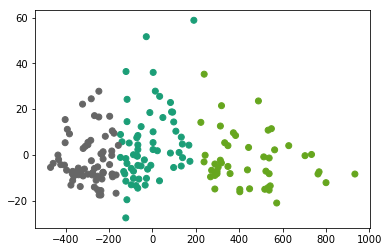

In [7]:
# Realizamos a Clusterização, agora com um número selecionado de Clusteres
kmeans.n_clusters = 3
kmeans.fit(X)
clts = kmeans.predict(X)

# Visualização das Métricas de Avaliação
homoScore = metrics.homogeneity_score(y, clts)
complScore = metrics.completeness_score(y, clts)  
vMeasureScore = metrics.v_measure_score(y, clts)

print("### Avaliação ({0} Clusters) ###".format(kmeans.n_clusters))
print("Homogeneity: \t{0:.3}".format(homoScore))
print("Completeness: \t{0:.3}".format(complScore))
print("V-Measure: \t{0:.3}".format(vMeasureScore))

# Plotando uma visualização 2-Dimensional dos Dados, agora com os clusteres designados pelo K-Means
# Compare a visualização com os gráficos anteriores
plt.scatter(pcaData[:,0], pcaData[:,1], c=clts, cmap=plt.cm.Dark2)
plt.show()